<h1>Data Acquisition</h1>

<h2>Importing Libraries</h2>
<p>
For dealing with file, I have imorted "pandas" libray, for numbers "numpy", for visualization purposes "seaborn and matplotlib is being used</p>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Read Data</h2>
<p>
We use <code>pandas.read_csv()</code> function to read the csv file. In the bracket, we put the file path along with a quotation mark, so that pandas will read the file into a data frame from that address.</p>

In [2]:
df=pd.read_csv("C:/Users/a/Downloads/dataframe_.csv")

In [5]:
df.head(10)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
5,-134.366669,-116.000000
6,-115.563739,-126.267621
7,-132.080161,-132.032206
8,-133.366669,-114.000000
9,-119.524112,-94.419855


In [4]:
df.tail(10)

,input,output
1687,41.117227,-107.611418
1688,26.692772,-111.741529
1689,42.929340,-93.571967
1690,24.633331,-91.000000
1691,11.632918,-72.708790
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052
1696,17.145296,-101.726894


In [6]:
df.dtypes

input     float64
output    float64
dtype: object

In [10]:
df.describe

<bound method NDFrame.describe of            input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1692   25.410184  -76.380902
1693   29.537304  -82.796934
1694   31.633331  -87.000000
1695   29.091458 -104.943052
1696   17.145296 -101.726894

[1697 rows x 2 columns]>

In [12]:
df.info

<bound method DataFrame.info of            input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1692   25.410184  -76.380902
1693   29.537304  -82.796934
1694   31.633331  -87.000000
1695   29.091458 -104.943052
1696   17.145296 -101.726894

[1697 rows x 2 columns]>

In [11]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


<h1>Data Wrangling</h1>

<h2>Identifying and handling missing values</h2>

<p> We are going to search for null values. Sometimes null values are represented by "?" so for searching this I have used "isin" function.</p>

In [14]:
df.isin(['?']).any()

input     False
output    False
dtype: bool

In [25]:
missing_data=df.isnull()

In [24]:
df.isnull().sum(axis=0)

input     1
output    1
dtype: int64

<h4>Count missing values in each column</h4>

In [26]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

input
False    1696
True        1
Name: input, dtype: int64

output
False    1696
True        1
Name: output, dtype: int64



Based on the summary above, each column has 1697 rows of data, two columns containing missing data:
<ol>
    <li>"input": 1 missing data</li>
    <li>"output": 1 missing data</li>
</ol>

<h3>Dealing with missing data</h3>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

<b>Replace by mean<b>

In [29]:
avg_input = df["input"].astype("float").mean(axis=0)
print("Average of input:", avg_input)

Average of input: 1.159932645006416


In [30]:
avg_output = df["output"].astype("float").mean(axis=0)
print("Average of output:", avg_output)

Average of output: -34.08801719326943


In [31]:
df['input'].replace(np.nan, avg_input, inplace=True)
df['output'].replace(np.nan, avg_output, inplace=True)

In [32]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [33]:
norm_input= df['input']/df['input'].max()
norm_output = df['output']/df['output'].max()

In [36]:
# print(norm_input)
# print(norm_output)

0      -0.971334
1      -0.966624
2      -0.968134
3      -0.935544
4      -0.839017
          ...   
1692   -0.568202
1693   -0.615932
1694   -0.647199
1695   -0.780678
1696   -0.756753
Name: output, Length: 1697, dtype: float64


In [39]:
df.corr()

,input,output
input,1.000000,0.511776
output,0.511776,1.000000


<AxesSubplot:xlabel='input', ylabel='output'>

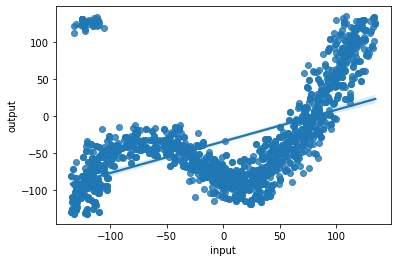

In [41]:
sns.regplot(x="input", y="output", data=df)

<p>This curve concludes that if input is less than zero than the output goes high but when the input is nearly equal to zero but as the input goes away from zero in positive direction the output again increases.</p>
<b> The group near (-100,100) are the outliers

In [43]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


C:\Users\a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input'>

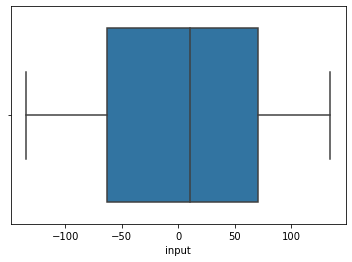

In [50]:
sns.boxplot(df['input'])

C:\Users\a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

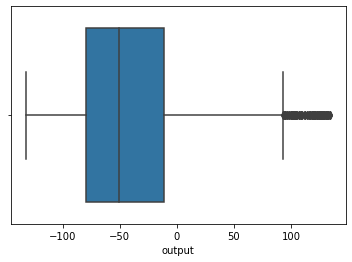

In [49]:
sns.boxplot(df['output'])

In [55]:
Z_Score = df['input'].mean() / df['input'].std()
# df['input'].mean()
# df['input'].std()

In [59]:
Z_Score

0.014685912403244402

<h3> P Value</h3>

In [44]:
from scipy import stats

In [45]:
pearson_coef, p_value = stats.pearsonr(df['input'], df['output'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5117757004836778  with a P-value of P = 6.280078800910794e-114


Since the p-value is  <
  0.001, the correlation between input and output is statistically significant, although the linear relationship isn't extremely strong (~0.5117)

<h1> Linear Regression</h2>

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lm = LinearRegression()
lm

LinearRegression()

In [62]:
X = df[['input']]
Y = df['output']

In [63]:
lm.fit(X,Y)

LinearRegression()

In [64]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([-86.87518319, -86.35998977, -92.06285051, -85.96569911,
       -89.92315363])

In [65]:
lm.intercept_

-34.58220008713727

In [66]:
lm.coef_

array([0.42604447])

.

$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$
​


 <b>Linear function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


<p>This plot will show a combination of a scattered data points (a <b>scatter plot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

(0.0, 147.76787831000001)

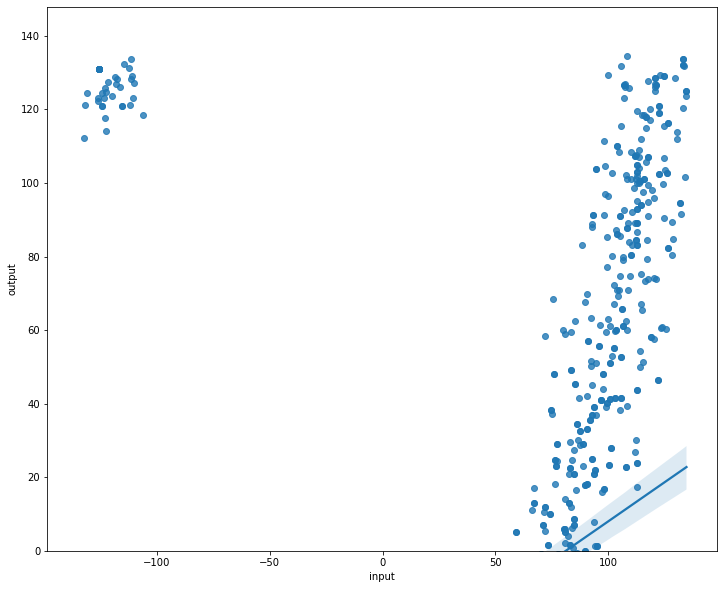

In [67]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="input", y="output", data=df)
plt.ylim(0,)

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>


<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

C:\Users\a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


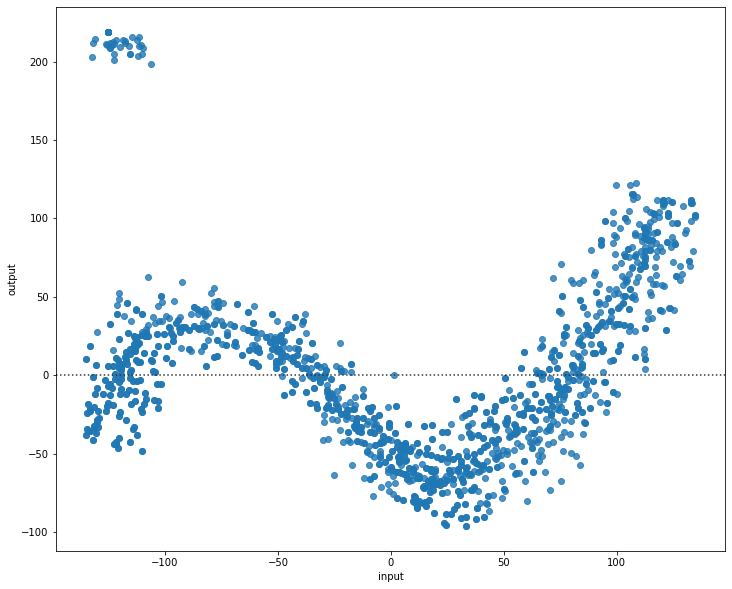

In [68]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['input'], df['output'])
plt.show()

In [69]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for input-output')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('output')

    plt.show()
    plt.close()

<h1>Polynomial Regression

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

In [70]:
x = df['input']
y = df['output']

In [71]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3            2
6.004e-05 x + 0.006994 x - 0.1567 x - 72.82


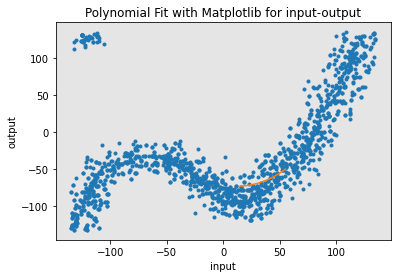

In [72]:
PlotPolly(p, x, y, 'input')

In [73]:
np.polyfit(x, y, 3)

array([ 6.00410571e-05,  6.99436862e-03, -1.56663023e-01, -7.28234061e+01])

<h2>R-Squared for linear</h2>

In [126]:
print('The R-square for linear regression is: ', lm.score(X_test, Y_test))

The R-square for linear regression is:  0.2645711041890637


In [81]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [-86.87518319 -86.35998977 -92.06285051 -85.96569911]


In [82]:
from sklearn.metrics import mean_squared_error

<h2>Mean Squared error for linear Regression</h2>

In [127]:
mse = mean_squared_error(df['output'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  3189.076841478018


In [85]:
from sklearn.metrics import r2_score

<h2>R-Squared value for poly</h2>

In [86]:
r_squared = r2_score(y, p(x))
print('The R-square value of Polynomial Regression is: ', r_squared)

The R-square value is:  0.6549316129206045


<h2>Mean Squared error for Polynomial Regression</h2>


In [87]:
mean_squared_error(df['output'], p(x))

1490.9511222852

In [88]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [89]:
yhat=lm.predict(new_input)
yhat[0:5]

array([-34.15615561, -33.73011114, -33.30406666, -32.87802219,
       -32.45197772])

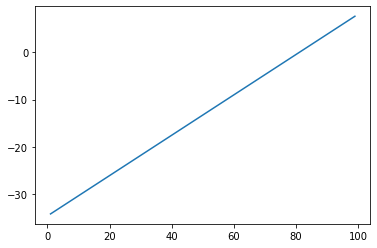

In [90]:
plt.plot(new_input, yhat)
plt.show()

<h2> The model with higher R-Squared value is a better fit for the data.
    <br>
    <br>
     The model with the smallest MSE value is a better fit for the data

<h1> Decision Trees</h1>

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
dc=DecisionTreeRegressor()
dc

DecisionTreeRegressor()

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [112]:
dc.fit(X_train, Y_train)

DecisionTreeRegressor()

In [113]:
dc.score(X_test, Y_test)

0.7144256652803515

<h3>The testing score for Decision Trees is 71.4%

In [121]:
Yhat_dc=dc.predict(X)
Yhat_dc[0:5] 

array([-130.5720846, -129.9389289, -130.1418321, -125.7609321,
       -112.7852137])

In [122]:
mse_dc = mean_squared_error(df['output'], Yhat_dc)
print('The mean square error of price and predicted value is: ', mse_dc)

The mean square error of price and predicted value is:  373.0123870891099


<h2>Neural Network</h2>

In [134]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [135]:
ml=MLPRegressor()
ml

MLPRegressor()

In [136]:
ml.fit(X_train,Y_train)

C:\Users\a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [137]:
ml.score(X_test, Y_test)

0.583198962850687

<h3>The testing score for Neural Network is 58.31%

<h2> For the given dataset I have used foloowing Algorithms:


<ol>
    <li>Algorithms<br>
        a. Linear Regression<br>
        b. Poly Regression<br>
        c. Decision Trees<br>
        d. Neural Network Regressor.
    </li>
</ol>

<h4> Among the four algorithms the Rsquared for Decision Trees is maximum with 0.71442. <br> Higher the value best is the model 

<ol>
    
        a. Linear Regression R-Squared:  0.2645711041890637
        b. Poly Regression R-Squared:0.6549316129206045
        c. Decision Trees R-Squared:0.7144256652803515
        d. Neural Network Regressor R-Squared:0.583198962850687.
    
</ol>

<h2> Hence the best algorithm for given dataset is decision Trees.
  